```
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). 

построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [10]:
df = pd.read_csv('athlete_events.csv')
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


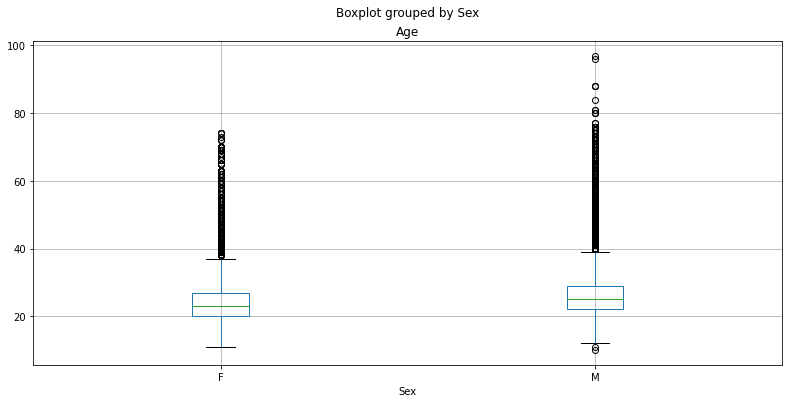

In [14]:
df.boxplot('Age', by = 'Sex')

Сравнение возраста мужчин и женщин, участников Олимпийских игр, позволяет увидеть, что средний возраст мужчин несколько выше, чем у женщин. Можно предположить, что это связано с особенностями физиологии: женщины раньше достигают максимальных возможностей в силе, выносливости, координации. Большое количество выбросов в обоих случаях отражает эволюцию Игр, их перехода из любительских соревнований, где было возможно участие людей самых разных возрастов (к тому же, в зачет Игр шли соревнования по искусству, где фактор возраста почти не играл роли), к мероприятию исключительно профессиональному, к которому атлеты подходят на пике формы.

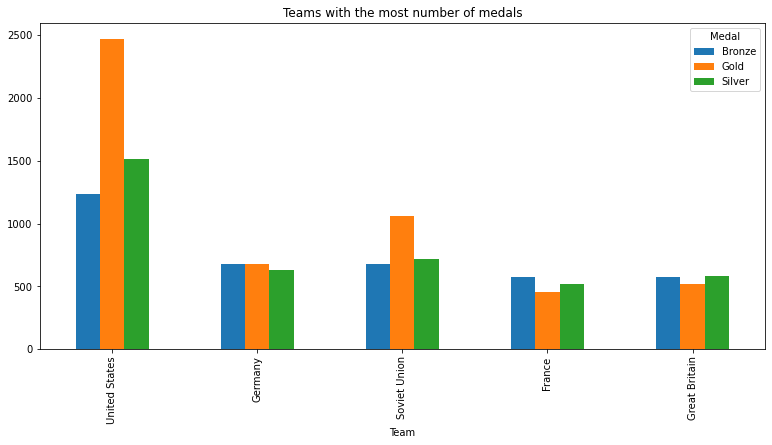

In [15]:
most_medal_teams = df[df['Medal'] != 'None']
pd.crosstab(most_medal_teams['Team'], most_medal_teams['Medal']).sort_values(['Bronze','Silver','Gold'], ascending = (False,False,False)).head(5).plot.bar(title = 'Teams with the most number of medals')
plt.show()

Лидерство США в медальном зачете отчетливее выглядит при сравнении с показателями СССР, чей распад не только повлиял на сокращение количества наград, но и пришелся на период, когда в программы Игр активно вливались новые виды спорта. В данной пятерке лидеров только у США и СССР подавляющую долю медалей составляют золотые.

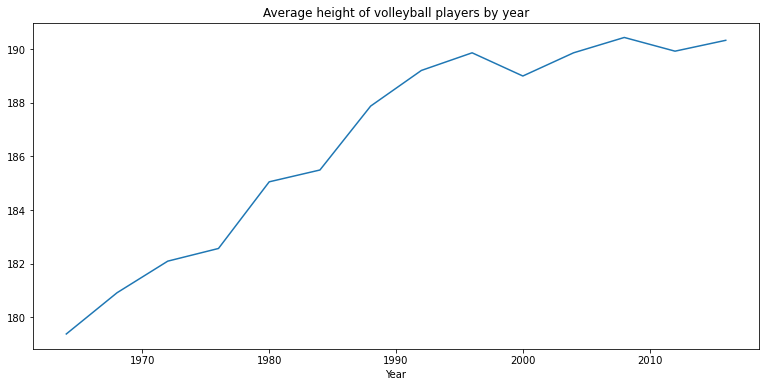

In [79]:
volleyball_df = df[df['Sport'] == 'Volleyball']
volleyball_df.groupby('Year')['Height'].mean().plot(title= 'Average height of volleyball players by year')
plt.show()

Можно наблюдать отчетливую тенденцию увеличения среднего роста игроков в волейбол, что является отражением "профессионализации" олимпийских спортивных дисциплин. Заметно, что с конца 1990-х в волейбол на Олимпиаде в среднем не играют люди ростом ниже 189 см. 

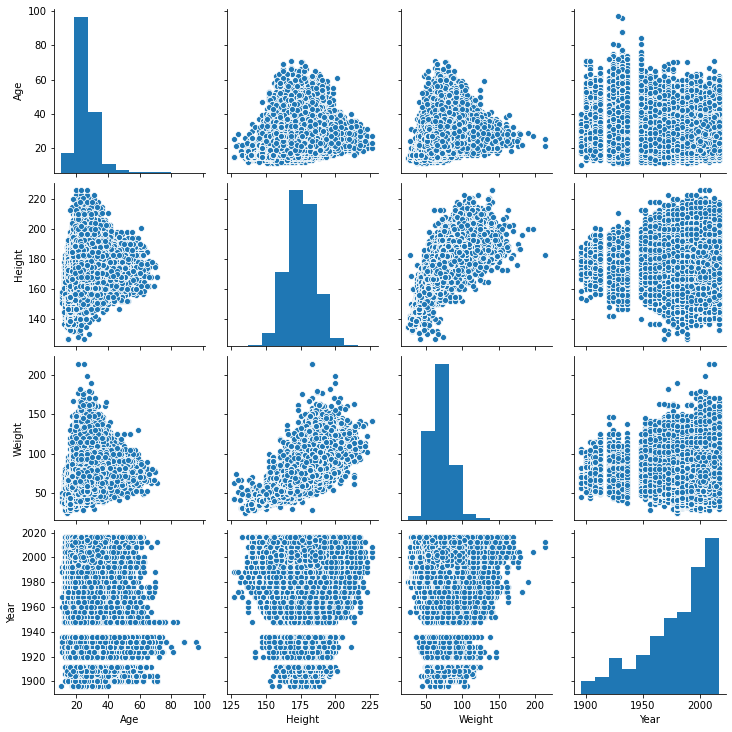

In [92]:
sns.pairplot(df[['Age', 'Height', 'Weight', 'Year']])

По данным диаграммам можно увидеть, что в целом между ростом и массой атлетов есть положительная корреляция, в то время как связь между возрастом и массой/ростом не так очевидна. По мере исторической хронологии возраст участников менялся не сильно (но стало меньше выбросов - аномально высоких показателей возраста). Вариации роста с каждыми ОИ расширялись как в сторону уменьшения, так и увеличения, в то время как показатель массы имеет только положительную динамику с увеличением верхних выбросов (согласуется с общей тенденцией увеличения антропометрических данных участников). Также на диаграммах прослеживаются четкие пропуски данных (из-за отменененных Игр во время обеих мировых войн).

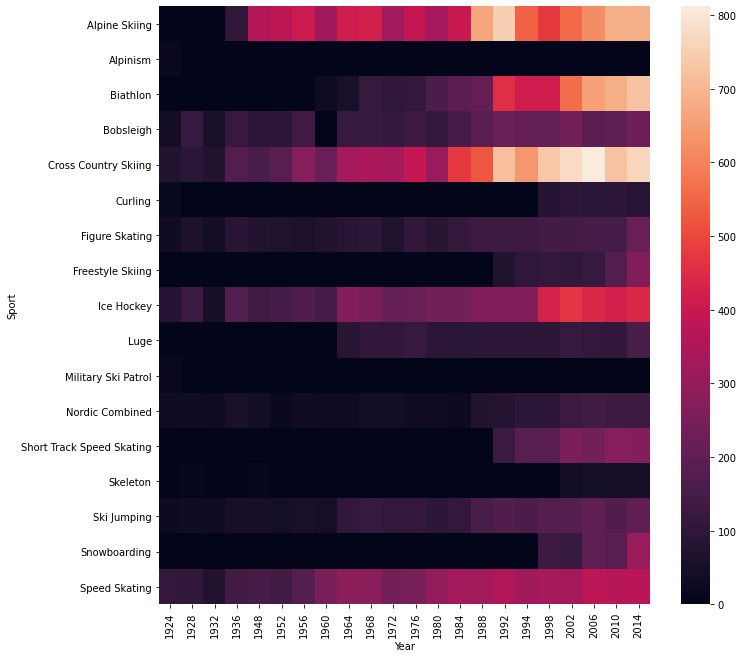

In [18]:
Winter_Sport = df[df['Season'] == 'Winter']
Year_Sport = pd.DataFrame(Winter_Sport.groupby('Sport')['Year'].value_counts().unstack(fill_value = 0))
f, ax = plt.subplots(figsize = (11, 11))
sns.heatmap(Year_Sport, annot = False, ax = ax)

В визуализации можно наблюдать развитие популярности зимних олимпийских дисциплин. В тройку лидеров по темпу роста количества соревнований попадают виды, так или иначе связанные с лыжами (лыжные гонки, горные лыжи, биатлон). При этом они входят и в число лидеров по наиболее длинной истории. В числе "аутсайдеров" - не только новые дисциплины со свежей олимпийской историей, но и представители редких видов, соревнований по которым больше в рамках ОИ нет. Например, соревнования военных патрулей или альпинизм (перенесен в летние виды под именем спортивного скалолазания).

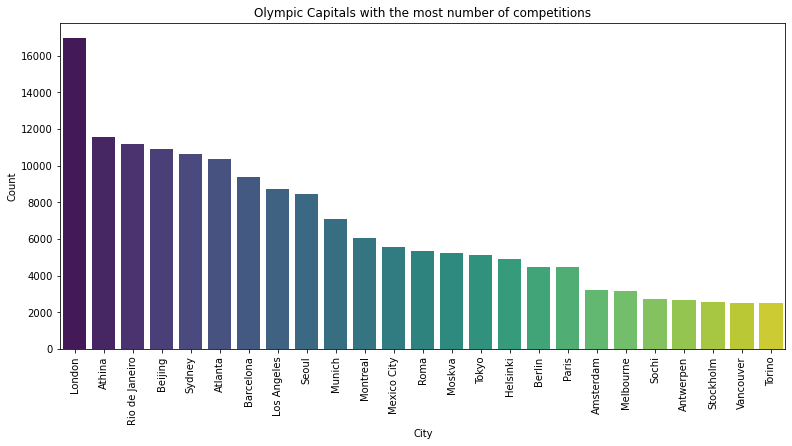

In [19]:
Olymp_Capitals = df.loc[:,['ID', 'City']].drop_duplicates().groupby(["City"]).size().reset_index()
Olymp_Capitals.columns = ['City', 'Count']
Olymp_Capitals = Olymp_Capitals.sort_values('Count', ascending = False)
sns.barplot(x = 'City', y = 'Count', data = Olymp_Capitals.head(25), palette = "viridis")
plt.title('Olympic Capitals with the most number of competitions') 
plt.xticks(rotation = 90)
plt.show()

Города, обеспечившие себе лидерство по количеству проведеных соревнований в рамках ОИ, достигли этого не только вследствие неоднократного приема Игр (Лондон и Афины), но и благодаря фактору "сезонности": так как количество зимних видов значительно уступает количеству летних, зимние ОИ не входят в топ-20 Игр с самым большим количеством соревнований и участников (Олимпиада в Сочи, являющаяся самой посещаемой среди зимних Игр, в общем рейтинге занимает 21-е место).